Big Data HW1

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from sklearn.cluster import KMeans
import time
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
files = glob('yellow_tripdata_2009*.csv')
print(files)
df = pd.concat((pd.read_csv(file) for file in files))

['yellow_tripdata_2009-01.csv', 'yellow_tripdata_2009-02.csv', 'yellow_tripdata_2009-03.csv']


In [3]:
print(df.columns)
df.head(1)

Index(['vendor_name', 'Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime',
       'Passenger_Count', 'Trip_Distance', 'Start_Lon', 'Start_Lat',
       'Rate_Code', 'store_and_forward', 'End_Lon', 'End_Lat', 'Payment_Type',
       'Fare_Amt', 'surcharge', 'mta_tax', 'Tip_Amt', 'Tolls_Amt',
       'Total_Amt'],
      dtype='object')


,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.0,0.0,9.4


Q1 : top-5 pickup/dropoff region

pickup

In [4]:
sLon = df['Start_Lon']
sLat = df['Start_Lat']

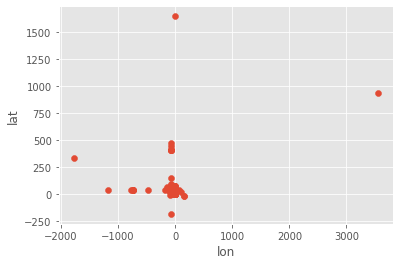

In [5]:
plt.scatter(sLon, sLat)
plt.xlabel('lon')
plt.ylabel('lat')
plt.show()

In [6]:
# lon(-70~-130) lat(23.5~50)
# delete data that out of range
delIndex1 = np.append(np.where(sLon < -130), np.where(sLon > -70))
delIndex2 = np.append(np.where(sLat < 23.5), np.where(sLat > 50))
delIndex = np.append(delIndex1, delIndex2)

tpickupLoc = np.column_stack((sLon, sLat))
pickupLoc = np.delete(tpickupLoc, delIndex, axis=0)

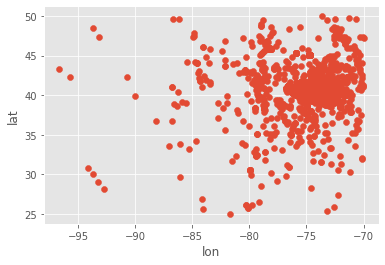

In [7]:
plt.scatter(pickupLoc[:,0], pickupLoc[:,1])
plt.xlabel('lon')
plt.ylabel('lat')
plt.show()

In [8]:
# use kmeans
km_fit = KMeans(n_clusters=10).fit(pickupLoc)
cluster_centers = km_fit.cluster_centers_
print(cluster_centers)

[[-73.96074829  40.78020682]
 [-73.13451489  41.36103705]
 [-73.99611772  40.72723752]
 [-73.78201681  40.64873624]
 [-77.10427992  32.46808312]
 [-74.78944161  45.12418439]
 [-75.84556765  40.45086835]
 [-73.98155906  40.75642246]
 [-73.87338593  40.76668914]
 [-85.17746776  41.57662025]]


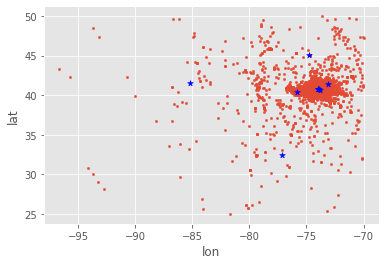

In [9]:
plt.scatter(pickupLoc[:,0], pickupLoc[:,1], s=5)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='*', c='b')
plt.xlabel('lon')
plt.ylabel('lat')
plt.show()

dropoff

In [10]:
eLon = df['End_Lon']
eLat = df['End_Lat']

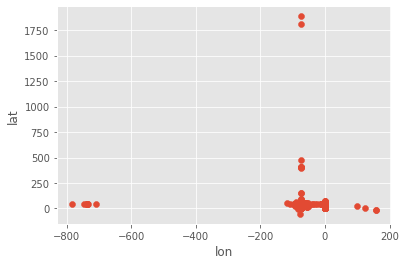

In [11]:
plt.scatter(eLon, eLat)
plt.xlabel('lon')
plt.ylabel('lat')
plt.show()

In [12]:
# lon(-70~-130) lat(23.5~50)
# delete data that out of range
delIndex1 = np.append(np.where(eLon < -130), np.where(eLon > -70))
delIndex2 = np.append(np.where(eLat < 23.5), np.where(eLat > 50))
delIndex = np.append(delIndex1, delIndex2)

tdropoffLoc = np.column_stack((eLon, eLat))
dropoffLoc = np.delete(tdropoffLoc, delIndex, axis=0)

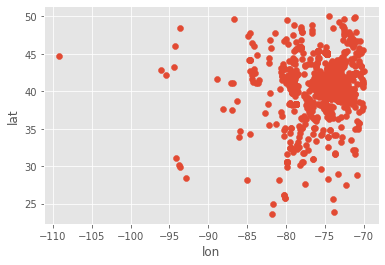

In [13]:
plt.scatter(dropoffLoc[:,0], dropoffLoc[:,1])
plt.xlabel('lon')
plt.ylabel('lat')
plt.show()

In [14]:
# use kmeans
km_fit = KMeans(n_clusters=10).fit(dropoffLoc)
cluster_centers = km_fit.cluster_centers_
print(cluster_centers)

[[-73.99785624  40.72933786]
 [-73.13499845  41.35820681]
 [-73.957755    40.78578681]
 [-74.77165315  45.12332123]
 [-78.56096382  32.21427409]
 [-76.64121009  40.67010916]
 [-73.97251203  40.67925044]
 [-73.78222069  40.66700344]
 [-73.98000703  40.75746888]
 [-73.88115491  40.76585555]]


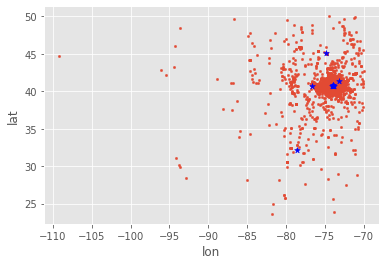

In [15]:
plt.scatter(dropoffLoc[:,0], dropoffLoc[:,1], s=5)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='*', c='b')
plt.xlabel('lon')
plt.ylabel('lat')
plt.show()

Q2 : peak hours and off-peak hour

In [17]:
import time

time_format = '%Y-%m-%d %H:%M:%S'

time_hour = []
for i in range(1, 25):
    time_hour.append(i)
print(time_hour)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [22]:
def get_hour(t):
    h = time.strptime(t, time_format).tm_hour
    return h

In [24]:
pickupTime = list(map(get_hour, df['Trip_Pickup_DateTime']))
dropoffTime = list(map(get_hour, df['Trip_Dropoff_DateTime']))

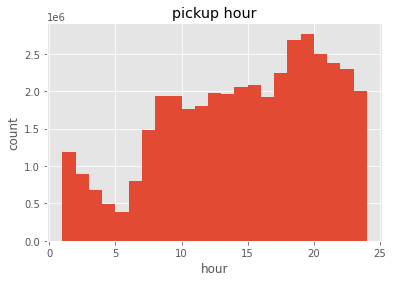

In [25]:
plt.hist(pickupTime, bins=time_hour)
plt.title('pickup hour')
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

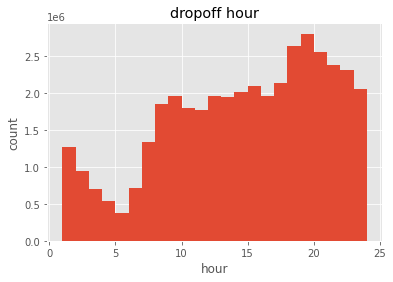

In [26]:
plt.hist(dropoffTime, bins=time_hour)
plt.title('dropoff hour')
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

Q3 : total amount

In [38]:
t_totalAmt = df['Total_Amt']
t_dist = df['Trip_Distance']
totalAmt = t_totalAmt.to_numpy()
dist = t_dist.to_numpy()

In [48]:
small_x = []
small_y = []
for i in range(len(totalAmt)):
    if totalAmt[i] < 5:
        small_x.append(dist[i])
        small_y.append(pickupTime[i])

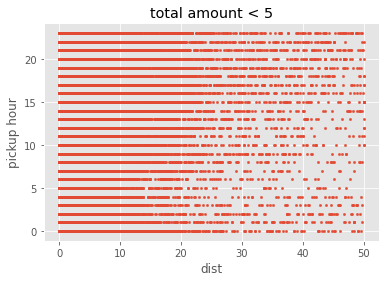

In [49]:
plt.scatter(small_x, small_y, s=5)
plt.title('total amount < 5')
plt.xlabel('dist')
plt.ylabel('pickup hour')
plt.show()

In [44]:
big_x = []
big_y = []
for i in range(len(totalAmt)):
    if totalAmt[i] > 200:
        big_x.append(dist[i])
        big_y.append(pickupTime[i])

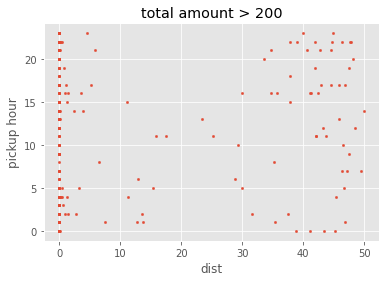

In [45]:
plt.scatter(big_x, big_y, s=5)
plt.title('total amount > 200')
plt.xlabel('dist')
plt.ylabel('pickup hour')
plt.show()

In [51]:
t_tip = df['Tip_Amt']
tip = t_tip.to_numpy()
big_tip = []
tx = []

j = 0
for i in range(len(totalAmt)):
    if totalAmt[i] > 200:
        tx.append(j)
        j += 1
        big_tip.append(tip[i])

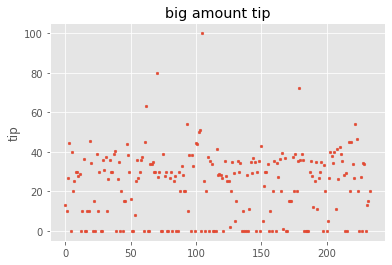

In [52]:
plt.scatter(tx, big_tip, s=7)
plt.title('big amount tip')
plt.ylabel('tip')
plt.show()